In [18]:
#importing necessary libraries
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



In [69]:
#Reading the data file
data = gpd.read_file('/Users/sdevkota01/Downloads/Python/GEO/DEC_lands/DEC_lands/DEC_lands.shp')

In [24]:
# checking te first 5 data on the datasets
data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [27]:
#checking the data type of the data sets
type(data)

geopandas.geodataframe.GeoDataFrame

In [19]:
# assining CLASS COUNTY and GEOMETRY colums a variable sd
sd = data[['CLASS','COUNTY','geometry']]
sd.CLASS.value_counts()
#We use the value_counts() method to see a list of different land types,
#along with how many times they appear in the dataset.
#(To review this (and related methods), 
#check out this tutorial from the Pandas micro-course.)

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [28]:
#observing bottom five data of the data sets
data.tail()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
2978,8976,UNCLASSIFIED,None,None,None,None,None,6,ST. LAWRENCE,https://www.dec.ny.gov/index.html,DECRP,12/17,POTSDAM,19.122040,4703,N,77417.166322,3217.461334,"POLYGON ((476797.577 4963760.373, 476813.252 4..."
2979,9281,UNCLASSIFIED,None,None,None,None,None,6,ST. LAWRENCE,https://www.dec.ny.gov/index.html,DECRP,12/17,POTSDAM,1.764896,4704,N,7145.329103,452.953460,"POLYGON ((474212.474 4961236.101, 474189.987 4..."
2980,9282,UNIQUE AREA,SENECA 90,JUNIUS POND UNIQUE AREA,None,BARE HILL,MANAGED BY DFW,8,SENECA,http://www.dec.ny.gov/,DECRP,12/17,AVON,95.815236,4708,N,387915.934613,2619.450307,"POLYGON ((340844.385 4757499.092, 341048.855 4..."
2981,9288,UNIQUE AREA,None,VROMAN'S NOSE UNIQUE AREA,None,None,None,4,SCHOHARIE,https://www.dec.ny.gov/index.html,DECRP,12/17,STAMFORD,138.487592,4706,None,560678.508528,4361.619502,"POLYGON ((553048.551 4715991.593, 553061.611 4..."
2982,2929,FOREST PRESERVE,AFP,BEAR POND PRIMITIVE AREA,PRIMITIVE,FIVE PONDS,None,6,HERKIMER,http://www.dec.ny.gov/lands/34719.html,SLTRANS,7/11,POTSDAM,17.457989,250,N,70680.117162,14145.145926,"POLYGON ((495150.066 4871132.485, 495156.318 4..."


In [30]:
# selecting land that falls under 'Wild Forest' or 'WildERNESS'
wild_land = sd.loc[sd.CLASS.isin(['WILS FOREST','WILDERNESS'])]

In [70]:
#describing the data set wild_land
wild_land.describe()

,CLASS,COUNTY,geometry
count,52,52,52
unique,1,8,52
top,WILDERNESS,HAMILTON,"POLYGON ((554752.5022 4896638.3673, 554694.415..."
freq,52,20,1


In [33]:
# observing first 10 data of wild_land
wild_land.head(10)

,CLASS,COUNTY,geometry
45,WILDERNESS,FRANKLIN,"POLYGON ((554752.502 4896638.367, 554694.415 4..."
93,WILDERNESS,ULSTER,"POLYGON ((549961.449 4663087.382, 549964.601 4..."
113,WILDERNESS,HAMILTON,"POLYGON ((554668.249 4881707.500, 554662.250 4..."
479,WILDERNESS,ST. LAWRENCE,"POLYGON ((527383.561 4887145.500, 527401.435 4..."
497,WILDERNESS,ESSEX,"POLYGON ((572855.188 4914160.500, 572839.313 4..."
557,WILDERNESS,ESSEX,"POLYGON ((571542.062 4912517.500, 571538.063 4..."
588,WILDERNESS,HAMILTON,"POLYGON ((554578.625 4881813.500, 554566.626 4..."
624,WILDERNESS,HAMILTON,"POLYGON ((554554.750 4881679.500, 554548.750 4..."
631,WILDERNESS,ESSEX,"POLYGON ((596835.577 4907622.905, 596840.035 4..."
790,WILDERNESS,HERKIMER,"POLYGON ((498271.843 4837938.255, 498252.562 4..."


<AxesSubplot:>

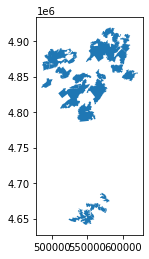

In [34]:
#plotting the wild_land data into map
wild_land.plot()

In [35]:
# checking first five data on geometry column of wild_land
wild_land.geometry.head()

45     POLYGON ((554752.502 4896638.367, 554694.415 4...
93     POLYGON ((549961.449 4663087.382, 549964.601 4...
113    POLYGON ((554668.249 4881707.500, 554662.250 4...
479    POLYGON ((527383.561 4887145.500, 527401.435 4...
497    POLYGON ((572855.188 4914160.500, 572839.313 4...
Name: geometry, dtype: geometry

In [37]:
# campsites in NEW YORK state (point)
new = gpd.read_file("/Users/sdevkota01/Downloads/Python/GEO/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")

In [38]:
#checking first 5 data of new 
new.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
0,91706,CFP,DELAWARE WILD FOREST,ADA PRIMITIVE CAMPSITE,PRIMITIVE CAMPSITE,None,4,STAMFORD,2016-09-26,16519,N,POINT (505138.696 4649388.247)
1,108646,SCHUYLER 02,SUGAR HILL STATE FOREST,MAPLE LANE CAMPSITE #3,PRIMITIVE CAMPSITE,None,8,BATH,2018-02-23,18124,N,POINT (333481.874 4692737.800)
2,19933,AFP,MOOSE RIVER PLAINS WILD FOREST,MOOSE RIVER PLAINS CAMPSITE 103,PRIMITIVE CAMPSITE,LIVE,5,NORTHVILLE,2010-06-16,1018,N,POINT (525210.784 4833837.295)
3,3945,ALLEGANY 12,LOST NATION STATE FOREST,NEWLAND FR PARKING,UNPAVED PARKING LOT,-99,9,WEST ALMOND,None,8623,N,POINT (231909.125 4712818.500)
4,1037,CATTARAUGUS 08,ROCK CITY STATE FOREST,LRC PICNIC PAVILION #1,PICNIC PAVILION,None,9,ALLEGANY,None,14561,N,POINT (193656.734 4679632.500)


In [71]:
# campsites in new york state campsites are point 
# only taking primitive campsite from new.ASSET
campsites = new.loc[new.ASSET == 'PRIMITIVE CAMPSITE']

campsites

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
0,91706,CFP,DELAWARE WILD FOREST,ADA PRIMITIVE CAMPSITE,PRIMITIVE CAMPSITE,None,4,STAMFORD,2016-09-26,16519,N,POINT (505138.696 4649388.247)
1,108646,SCHUYLER 02,SUGAR HILL STATE FOREST,MAPLE LANE CAMPSITE #3,PRIMITIVE CAMPSITE,None,8,BATH,2018-02-23,18124,N,POINT (333481.874 4692737.800)
2,19933,AFP,MOOSE RIVER PLAINS WILD FOREST,MOOSE RIVER PLAINS CAMPSITE 103,PRIMITIVE CAMPSITE,LIVE,5,NORTHVILLE,2010-06-16,1018,N,POINT (525210.784 4833837.295)
5,39673,AFP,SARANAC LAKES WILD FOREST,SARANAC ISLANDS CAMPGROUND SITE 27,PRIMITIVE CAMPSITE,None,5,RAY BROOK,2012-01-09,5337,N,POINT (562996.482 4904871.885)
6,19434,AFP,LAKE GEORGE WILD FOREST,GAY POND ROAD CAMPSITE 13,PRIMITIVE CAMPSITE,DESIGNATED CAMPSITE WITH ACCESSIBLE PRIVY AND ...,5,WARRENSBURG,2010-05-24,3030,Y,POINT (591292.402 4807432.222)
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,84660,AFP,INDEPENDENCE RIVER WILD FOREST,None,PRIMITIVE CAMPSITE,None,0,None,None,15828,N,POINT (493753.216 4855738.309)
4310,4440,AFP,WILCOX LAKE WILD FOREST,INDIAN POND TRAIL CAMPSITE,PRIMITIVE CAMPSITE,None,5,WARRENSBURG,2016-09-21,9460,N,POINT (575387.422 4815903.913)
4312,6662,AFP,SARANAC LAKES WILD FOREST,RAQUETTE RIVER SITE 3,PRIMITIVE CAMPSITE,None,5,RAY BROOK,None,13671,N,POINT (549184.220 4898291.000)
4314,39711,AFP,SARANAC LAKES WILD FOREST,SARANAC ISLANDS CAMPGROUND SITE 65,PRIMITIVE CAMPSITE,None,5,RAY BROOK,2012-01-09,5374,N,POINT (559949.450 4901744.055)


In [72]:
# footrails in new york state foottrails are line string
#reading footrail data
footrails = gpd.read_file("/Users/sdevkota01/Downloads/Python/GEO/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")

In [58]:
#checking bottom five data of footrails
footrails.tail()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,ATV,FOOT,HORSE,BIKE,XC,...,MAPPWD,DESCRIP,ROAD_CLASS,UPDATED,REGION,OFFICE,MARKER,TRANS_UID,SHAPE_LEN,geometry
8137,157423,CHENANGO 24,PHARSALIA WOODS STATE FOREST,NINE MILE TRUCK TRAIL,UNPAVED ROAD,N,N,N,N,N,...,N,None,AR,2018-04-04,7,SHERBURNE,None,11078.231042,6321.863380,"LINESTRING (450418.188 4713637.500, 450404.188..."
8138,157430,CATTARAUGUS 20,BOYCE HILL STATE FOREST,FRANKLINVILLE SNOWMOBILE CLUB TRAIL,SNOWMOBILE TRAIL,N,N,N,N,N,...,N,FRANKLINVILLE SNOWMOBILE CLUB,RT,2018-03-27,9,ALLEGANY,None,778.499273,778.499273,"LINESTRING (208326.645 4690982.422, 208300.693..."
8139,157438,AFP,INDEPENDENCE RIVER WILD FOREST,FLORENCE POND ROAD,UNPAVED ROAD,N,Y,Y,Y,Y,...,N,YELLOW,FPR,2011-03-22,6,LOWVILLE,Yellow,741.100936,4285.822321,"LINESTRING (478940.856 4841512.499, 478899.532..."
8140,157651,CHENANGO 5,PHARSALIA WOODS STATE FOREST,NINE MILE TRUCK TRAIL,UNPAVED ROAD,N,N,N,N,N,...,N,None,AR,2018-04-04,7,SHERBURNE,None,11078.231042,5395.937432,"LINESTRING (444809.601 4714511.923, 444791.940..."
8141,157652,AFP,MOOSE RIVER PLAINS CAMPING AREA,NORTHVILLE-PLACID TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-20,5,NORTHVILLE,None,1897.906205,342.000448,"LINESTRING (540828.622 4840053.093, 540833.660..."


In [73]:
#choosing only foot trails from footrails.ASSET
trails = footrails.loc[footrails.ASSET == 'FOOT TRAIL']
trails

,OBJECTID,UNIT,FACILITY,NAME,ASSET,ATV,FOOT,HORSE,BIKE,XC,...,MAPPWD,DESCRIP,ROAD_CLASS,UPDATED,REGION,OFFICE,MARKER,TRANS_UID,SHAPE_LEN,geometry
31,304,AFP,DEBAR MOUNTAIN WILD FOREST,MAIN BRANCH CANOE CARRY,FOOT TRAIL,N,M,N,N,N,...,N,None,RT,2006-08-24,5,RAY BROOK,None,244.776100,246.427662,"LINESTRING (542463.277 4933622.421, 542429.239..."
34,311,AFP,DEBAR MOUNTAIN WILD FOREST,CAMP SITE ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,163.203974,163.203974,"LINESTRING (564033.375 4922561.921, 564100.343..."
35,312,AFP,DEBAR MOUNTAIN WILD FOREST,ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,117.720119,117.720119,"LINESTRING (564202.360 4922745.700, 564298.863..."
37,314,AFP,DEBAR MOUNTAIN WILD FOREST,EAST BRANCH CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2006-08-24,5,RAY BROOK,None,386.073522,386.073522,"LINESTRING (547547.421 4942827.828, 547629.172..."
38,317,AFP,DEBAR MOUNTAIN WILD FOREST,RAINBOW LAKE TO JONES POND CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-04-19,5,RAY BROOK,None,127.460965,127.460965,"LINESTRING (564759.838 4923577.416, 564654.630..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8127,157368,SCHOHARIE 73,VROMAN'S NOSE UNIQUE AREA,GREEN TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,AT,2018-03-21,4,STAMFORD,Other,247.794903,247.794903,"LINESTRING (552862.643 4715867.940, 552856.510..."
8128,157369,SCHOHARIE 73,VROMAN'S NOSE UNIQUE AREA,LONG PATH/BLUE TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2018-03-21,4,STAMFORD,Blue,204.284952,204.284952,"LINESTRING (553067.077 4715906.752, 553063.800..."
8131,157399,SCHOHARIE 73,VROMAN'S NOSE UNIQUE AREA,LONG PATH/RED TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2018-03-21,4,STAMFORD,Red,3.634681,3.634681,"LINESTRING (552335.763 4715556.901, 552339.285..."
8133,157404,AFP,WHITEFACE MOUNTAIN SKI CENTER,WHITEFACE LANDING TO WHITEFACE MTN. TRAIL,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2010-08-11,5,RAY BROOK,None,1150.454702,565.720876,"LINESTRING (587412.689 4913071.803, 587477.609..."


In [74]:
#counties boundary in newyork, counties are polygon 
#reading counties data file
counties = gpd.read_file("/Users/sdevkota01/Downloads/Python/GEO/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")
counties

,STATE,COUNTY,NAME,LSAD,LSAD_TRANS,OID_,COUNTY_FIP,POP2000,WHITE,BLACK,...,FHH_MINORC,FAMILIES,AV_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,36,089,St. Lawrence,06,County,44,089,111931,105782,2664,...,2773,26939,3,49721,16085,33636,9215,28606,11900,"POLYGON ((522686.116 4977770.435, 522785.820 4..."
1,36,019,Clinton,06,County,9,019,79894,74562,2863,...,1951,19261,3,33091,12161,20930,3668,20157,9266,"POLYGON ((576869.554 4981194.984, 576661.323 4..."
2,36,033,Franklin,06,County,16,033,51134,42970,3389,...,1312,11805,3,23936,7409,16527,6005,12638,5293,"POLYGON ((576869.554 4981194.984, 577209.259 4..."
3,36,031,Essex,06,County,15,031,38851,36848,1092,...,810,9832,3,23115,4288,18827,8087,11089,3939,"POLYGON ((622025.362 4932488.545, 621958.049 4..."
4,36,045,Jefferson,06,County,22,045,111738,99118,6517,...,2815,28142,3,54070,20947,33123,14002,23906,16162,"POLYGON ((431513.316 4917024.860, 433126.724 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,36,005,Bronx,06,County,2,005,1332650,398003,475007,...,88869,315090,3,490659,490659,0,27447,90687,372525,"POLYGON ((603382.183 4523878.795, 603617.557 4..."
63,36,081,Queens,06,County,40,081,2229379,982725,446189,...,56893,537991,3,817250,817250,0,34586,334815,447849,"POLYGON ((599868.618 4517830.239, 600291.542 4..."
64,36,047,Kings,06,County,23,047,2465326,1015728,898350,...,107838,584120,3,930866,930866,0,50139,238367,642360,"POLYGON ((587607.733 4509985.224, 588264.847 4..."
65,36,061,New York,06,County,30,061,1537195,835610,267302,...,47842,301970,3,798144,798144,0,59500,148732,589912,"POLYGON ((580859.314 4505568.615, 581030.213 4..."


<AxesSubplot:title={'center':'NEW YORK STATE\n Counties'}>

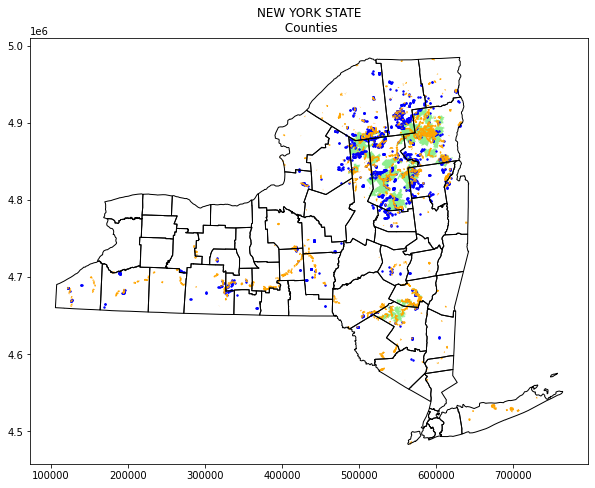

In [97]:
#defining a base map with county boundries 
ax = counties.plot(figsize = (10,10), color ='none',edgecolor='black',zorder =3)
ax.set(title = 'NEW YORK STATE\n Counties')
#adding wild_land, campsites and trails to the base ax
wild_land.plot(color = 'lightgreen',label = 'Wild_land',ax = ax)
campsites.plot(color = 'blue',label = 'campsites',markersize = 2, ax = ax)
trails.plot(color = 'orange',label = 'trails',markersize = 1, ax = ax)
